# PART 3: Sampling

Let's understand the imbalance of our data according to our label.
To see if we need undersampling or oversampling

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

### Import the datasets

Let's start by importing our data at `pre-processed/filtered_features.csv`

In [8]:
dataset = pd.read_csv("../data/pre-processed/filtered_features.csv", index_col=False)
dataset

,AGE,ALCOHOL CONSUMING,ALLERGY,CHEST PAIN,WHEEZING,LUNG_CANCER
0,69,1,0,1,1,1
1,74,0,1,1,0,1
2,59,0,0,1,1,0
3,63,1,0,1,0,0
4,63,0,0,0,1,0
...,...,...,...,...,...,...
304,56,1,0,0,0,1
305,70,1,1,1,1,1
306,58,1,1,1,1,1
307,67,1,1,1,0,1


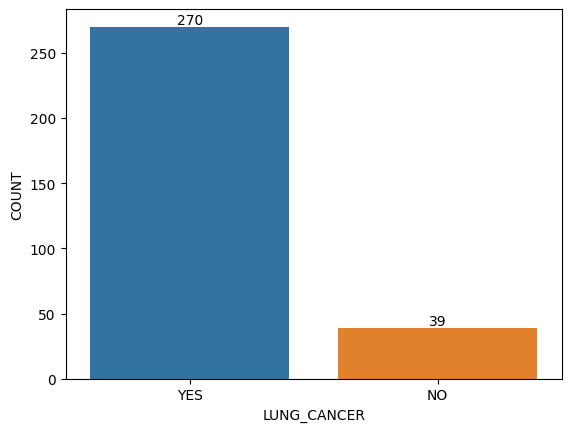

In [9]:
lung_cancer = dataset[dataset["LUNG_CANCER"] == 1]
no_lung_cancer = dataset[dataset["LUNG_CANCER"] == 0]

df = pd.DataFrame({
    "LUNG_CANCER": ["YES", "NO"],
    "COUNT": [len(lung_cancer), len(no_lung_cancer)],
})

ax = sns.barplot(data=df, x="LUNG_CANCER", y="COUNT")
ax.bar_label(ax.containers[0])
plt.show()

### Understand above data

We can see that the `LUNG_CANCER` people is 270 compare to the non-`LUNG_CANCER` people around 39 people

Because the imbalance data, we need to do oversampling on this.

Why? 

Because if imbalance data happened, the model will has a bias, because the data tend to show more "LUNG_CANCER" data to be trained.

Meaning it will more-likely predict the future data into the majority label

Let's use SMOTE to handle this imbalance data

In [10]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 120)


x_sm, y_sm = sm.fit_resample(dataset.drop("LUNG_CANCER", axis=1), dataset["LUNG_CANCER"])

dataset_sm = pd.concat([x_sm, y_sm], axis=1)
dataset_sm

,AGE,ALCOHOL CONSUMING,ALLERGY,CHEST PAIN,WHEEZING,LUNG_CANCER
0,69,1,0,1,1,1
1,74,0,1,1,0,1
2,59,0,0,1,1,0
3,63,1,0,1,0,0
4,63,0,0,0,1,0
...,...,...,...,...,...,...
535,56,0,0,0,0,0
536,55,0,0,0,0,0
537,60,0,0,0,0,0
538,56,0,0,0,0,0


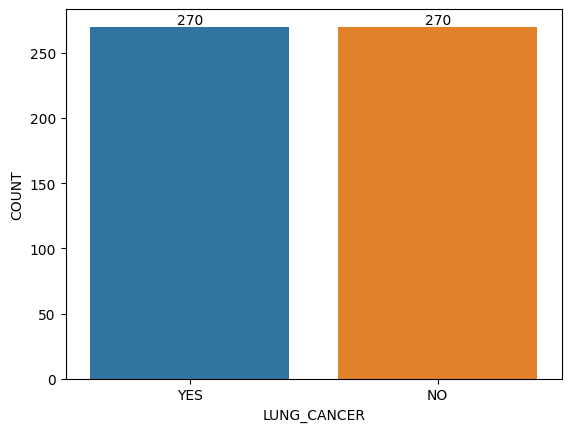

In [11]:
lung_cancer = dataset_sm[dataset_sm["LUNG_CANCER"] == 1]
no_lung_cancer = dataset_sm[dataset_sm["LUNG_CANCER"] == 0]

df = pd.DataFrame({
    "LUNG_CANCER": ["YES", "NO"],
    "COUNT": [len(lung_cancer), len(no_lung_cancer)],
})

ax = sns.barplot(data=df, x="LUNG_CANCER", y="COUNT")
ax.bar_label(ax.containers[0])
plt.show()

### Saving the data

Now the data already has a same label size, which has 270 "YES" and 270 "NO"

which we now can save the data inside `processed/final.pkl`

We will use pickle file to easy load on our model, so it's not burden.

In [12]:
dataset_sm.to_pickle("../data/processed/final_sm.pkl")